<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Computer_vision_exercises_part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - OpenCV - Fifth Task
@author Tomasz Skrzypczyk



## Face detection task

Your task will be to detect and crop the face from given image. Change its color to grayscale in place it back on the original image.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# We must download the deep learning model for Face detection
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2023-02-05 14:24:28--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-02-05 14:24:28 (18.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



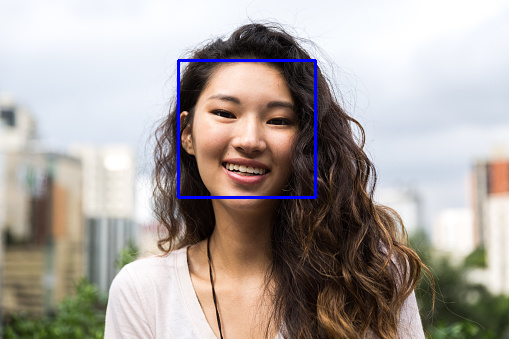

In [ ]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('/content/face.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw blue rectangle around the faces
for (x, y, w, h) in faces:
    # use rectangle method, set the color to blue and thickness to 2
    cv2.rectangle(img,(x,y),(w+x,h+y),(255,0,0),2)
# Display the output
cv2_imshow(img)



In [ ]:
# What are the coordinates of the face?
faces[0]
print(faces[0])

[178  60 137 137]


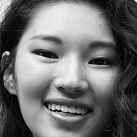

In [ ]:
# Extract the face from the grayscale image using numpy
# Remember what we said about x and y order in opencv?
start_point = (x, y)
end_point = (w + x, h+ y)
cv2.rectangle(img, start_point, end_point,(255, 0, 0), 2)
face = gray[start_point[1]:end_point[1], start_point[0]:end_point[0]]
cv2_imshow(face)

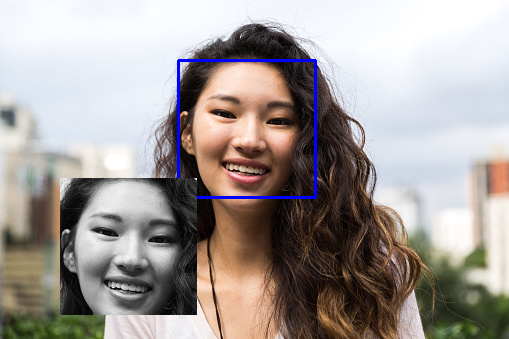

In [ ]:
# Put the grayscale image on the colored image using only numpy slicing

# Notice that you cannot assign a 1 channel image to a 3 channel image
# so the operation img[...] = face will not work!
# Try to create a 3-channel grayscale image by repeating the grayscale image three times
# you may use opencv merge method

grayscale_three_channels = cv2.merge([face, face, face])

img[x:w + x,y: h+y] = grayscale_three_channels

cv2_imshow(img)


(178, 60) (178, 197) (315, 60) (315, 197)


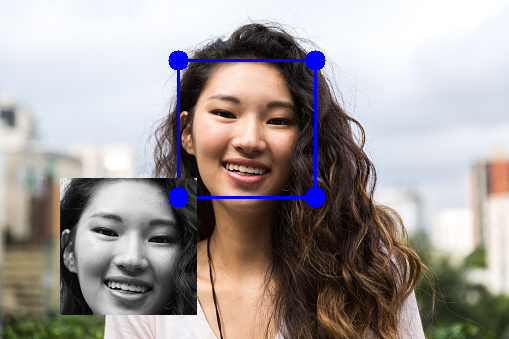

In [ ]:
# What are the coordinates of the face?
# DG: tip -> do you remember x and y order in opencv?
x, y = faces[0][:2]
w, h = faces[0][2:]
left_upper = (x,y)
left_lower = (x,y+h)
right_upper = (x+w,y)
right_lower = (x+w, y+h)
print(left_upper, left_lower, right_upper, right_lower)
circle_coordinates = [left_upper, left_lower, right_upper, right_lower]

#a potem:

# Draw the points of the bounding box of a face on the picture
# use circle method
for circle_center in circle_coordinates:
   cv2.circle(img, circle_center, radius=10, color=(255,0,0), thickness=-1)
cv2_imshow(img)

# Expected output

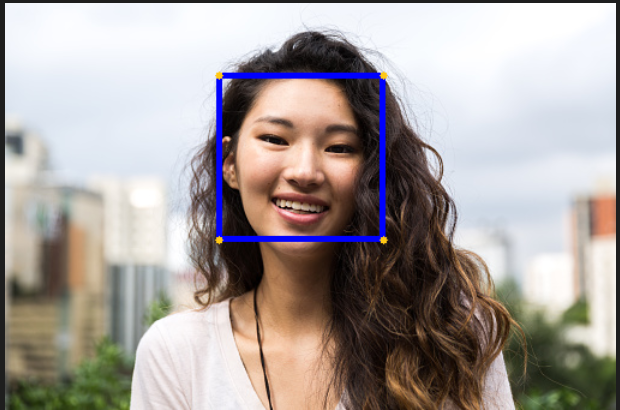